# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)

temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [17]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [18]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

# temps_df["AvgTemperatureCelsius"] = ...  # TODO: uncomment this line to complete it

temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5.0/9.0

In [19]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_countries_list = temps_df['City'].unique().tolist()
n_unique_countries = len(unique_countries_list)
print(f"There are {n_unique_countries} different cities: {unique_countries_list}")

# TODO: print a message with the number of unique countries and the list of them

There are 10 different cities: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [20]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df['Date'].min()
max_date = temps_df['Date'].max()
print(f"Min date: {min_date}, Max date: {max_date}")

# TODO: print a message with the min and max dates

Min date: 2000-01-01, Max date: 2019-12-31


In [21]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = temps_df['AvgTemperatureCelsius'].min()
max_temp = temps_df['AvgTemperatureCelsius'].max()

min_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'] == min_temp, 'City'].values[0]
min_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'] == min_temp, 'Date'].values[0]

max_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'] == max_temp, 'City'].values[0]
max_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'] == max_temp, 'Date'].values[0]

print(f"Minimum temperature: {min_temp}C in {min_temp_city} on {min_temp_date}")
print(f"Maximum temperature: {max_temp}C in {max_temp_city} on {max_temp_date}")



Minimum temperature: -16.77777777777778C in Munich on 2000-01-25
Maximum temperature: 37.888888888888886C in Cairo on 2019-05-23


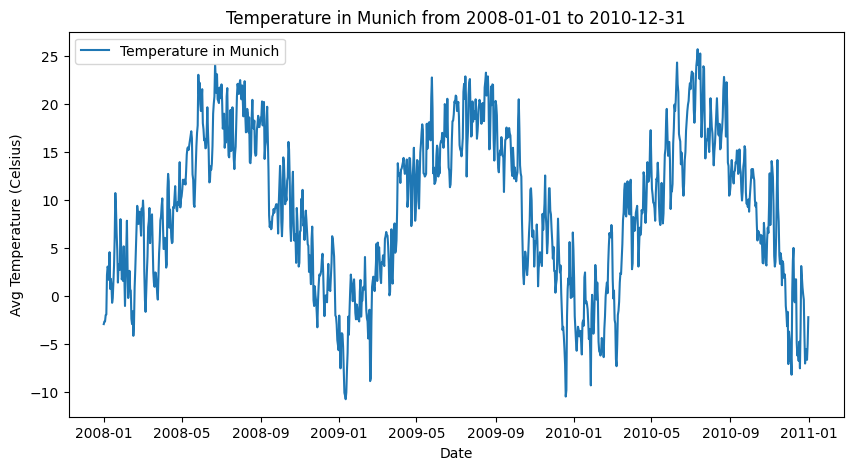

In [22]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df['City'] == city]

city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]

plt.figure(figsize=(10, 5))
plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'], label=f'Temperature in {city}')
plt.title(f'Temperature in {city} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (Celsius)')
plt.legend()
plt.show()




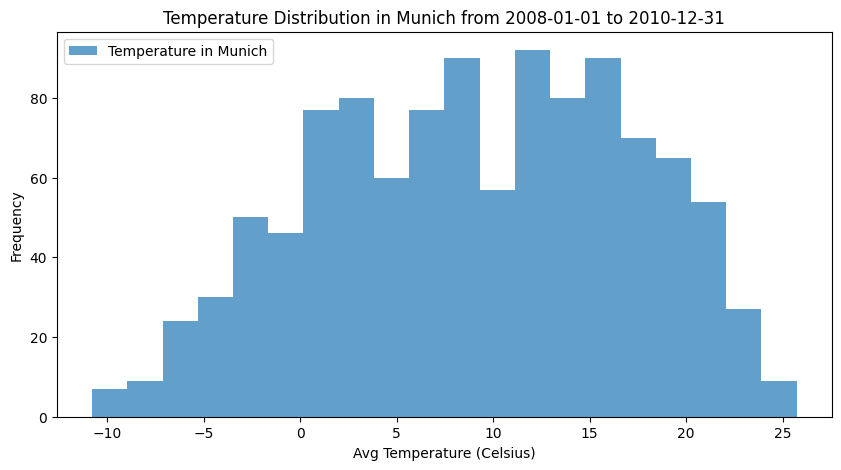

In [23]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))
plt.hist(city_df_period['AvgTemperatureCelsius'], bins=20, alpha=0.7, label=f'Temperature in {city}')
plt.title(f'Temperature Distribution in {city} from {start_date} to {end_date}')
plt.xlabel('Avg Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


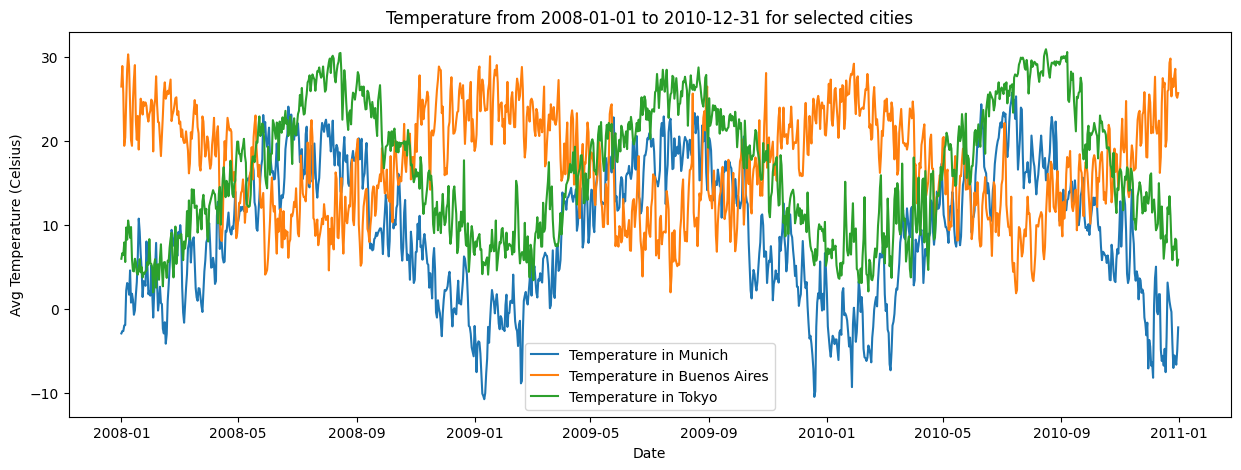

In [24]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))
for city in selected_cities:
    city_df = temps_df[temps_df['City'] == city]
    city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]
    plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'], label=f'Temperature in {city}')
plt.title(f'Temperature from {start_date} to {end_date} for selected cities')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (Celsius)')
plt.legend()
plt.show()

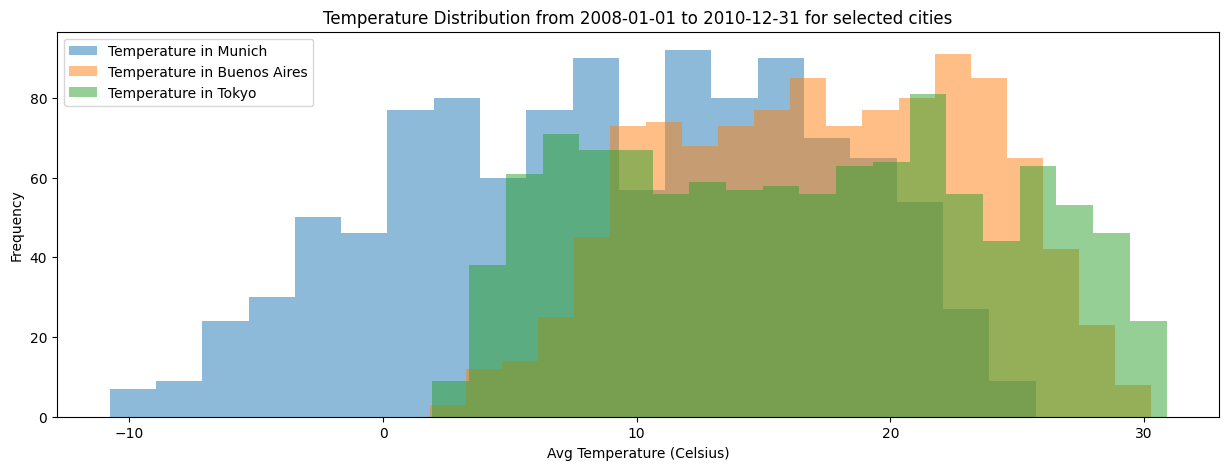

In [25]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))
for city in selected_cities:
    city_df = temps_df[temps_df['City'] == city]
    city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]
    plt.hist(city_df_period['AvgTemperatureCelsius'], bins=20, alpha=0.5, label=f'Temperature in {city}')
plt.title(f'Temperature Distribution from {start_date} to {end_date} for selected cities')
plt.xlabel('Avg Temperature (Celsius)')
plt.ylabel('Frequency')

plt.legend()

plt.show()
